In [1]:
# # Data Wrangling
# After completing this lab you will be able to:
# *   Handle missing values
# *   Correct data format
# *   Standardize and normalize data
# Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [5]:
#dataSet
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [6]:
#headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [11]:
#read dataset from url 
df=pd.read_csv(url,names=headers)
#we use the head function to display the five row of dataFrame
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [30]:
#Identify missing values
#replace '?' with NaN
df.replace('?',np.NaN,inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [25]:
#Evaluating for Missing Data
#"True" means the value is a missing value while "False" means the value is not a missing value.
missing_data=df.isnull()

In [27]:
#Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("--------------------")

symboling
False    205
Name: symboling, dtype: int64
--------------------
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
--------------------
make
False    205
Name: make, dtype: int64
--------------------
fuel-type
False    205
Name: fuel-type, dtype: int64
--------------------
aspiration
False    205
Name: aspiration, dtype: int64
--------------------
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
--------------------
body-style
False    205
Name: body-style, dtype: int64
--------------------
drive-wheels
False    205
Name: drive-wheels, dtype: int64
--------------------
engine-location
False    205
Name: engine-location, dtype: int64
--------------------
wheel-base
False    205
Name: wheel-base, dtype: int64
--------------------
length
False    205
Name: length, dtype: int64
--------------------
width
False    205
Name: width, dtype: int64
--------------------
height
False    205
Name: height, dtype: int64
-----------------

In [41]:
#Deal with missing data¶
# How to deal with missing data?
# Drop data
# a. Drop the whole row
# b. Drop the whole column
# Replace data
# a. Replace it by mean
# b. Replace it by frequency
# c. Replace it based on other functions///Reason: price is what we want to predict. 
# Any data entry without price data cannot be used for prediction; 
# therefore any row now without price data is not useful to us
# change missing data from normalized_loss column
normalized_loss=df["normalized-losses"].astype("float").mean(axis=0)
df.replace(np.NaN,normalized_loss,inplace=True)
#change missing data from num-of-doors
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)
#change missing data from bore
bore=df["bore"].astype("float").mean(axis=0)
df.replace(np.NaN,bore,inplace=True)
#change missing data from stroke
stroke=df["stroke"].astype("float").mean(axis=0)
df.replace(np.NaN,stroke,inplace=True)
#change missing data from horsepower
horsepower=df["horsepower"].astype("float").mean(axis=0)
df.replace(np.NaN,horsepower,inplace=True)
#change missing data from peak_rpm
peak_rpm=df["peak-rpm"].astype("float").mean(axis=0)
df.replace(np.NaN,peak_rpm,inplace=True)
df["peak-rpm"].value_counts().idxmax()
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)#Define in which columns to look for missing values:

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

#we have a dataset with no missing values

In [58]:
# The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

# In Pandas, we use:

# .dtype() to check the data type

# .astype() to change the data type
df.dtypes
#change 'price format'
df[['price','bore','stroke','wheel-base','compression-ratio']]=df[['price','bore','stroke','wheel-base','compression-ratio']].astype("float")
df[['normalized-losses','horsepower','peak-rpm','city-mpg','highway-mpg','engine-size']]=df[['normalized-losses','horsepower','peak-rpm','city-mpg','highway-mpg','engine-size']].astype("int")
df.dtypes
# Wonderful!
# Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int32
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int32
highway-mpg            int32
price                float64
dtype: object

In [63]:
# Data Standardization
# Data is usually collected from different agencies in different formats. (Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
# What is standardization?
# Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
# check your transformed data 
df.head()
#  Data Standardization is Done!

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,8.703704,13495.0,21.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,8.703704,16500.0,21.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,12.368421,9.038462,16500.0,19.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,9.791667,7.833333,13950.0,24.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,13.055556,10.681818,17450.0,18.0


In [65]:
# Data Normalization
# Why normalization?

# Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

# Example

# To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".

# Target: would like to normalize those variables so their value ranges from 0 to 1

# Approach: replace original value by (original value)/(maximum value)
df["width"]=df["width"]/df["width"].max()
df["height"]=df["height"]/df["height"].max()
df[["width","height"]].head()

,width,height
0,0.886584,0.816054
1,0.886584,0.816054
2,0.905947,0.876254
3,0.915629,0.908027
4,0.918396,0.908027


Text(0.5, 1.0, 'horsepower bins')

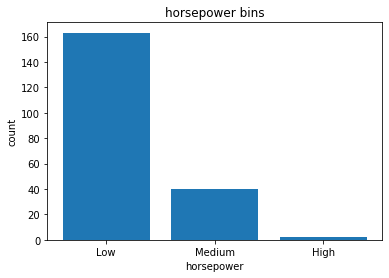

In [74]:
# Binning
# Why binning?
# Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
#We apply the function "cut" to determine what each value of df['horsepower'] belongs to.
df[['horsepower','horsepower-binned']].head(20)
#Let's see the number of vehicles in each bin:
df["horsepower-binned"].value_counts()
# plt.pyplot.hist(df["horsepower"])

# # set x/y labels and plot title
# plt.pyplot.xlabel("horsepower")
# plt.pyplot.ylabel("count")
# plt.pyplot.title("horsepower bins")

pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

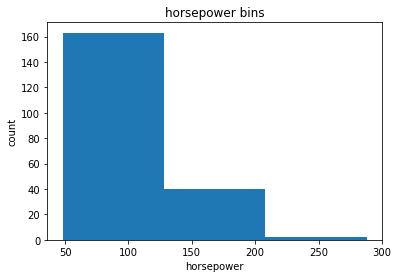

In [75]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [76]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [78]:
df.to_csv('clean_df.csv')

In [79]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,0.911588,0.898409,2555.565854,126.907317,5.645268,5.572390,10.142537,104.429268,5076.556098,9.949525,8.034347,12951.809756,25.219512
std,1.245307,31.681008,6.021776,12.337289,0.029671,0.040862,520.680204,41.642693,16.456470,16.467534,3.972040,39.557864,685.961457,2.573104,1.849782,8075.225842,6.542142
min,-2.000000,65.000000,86.600000,141.100000,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,122.000000,4.795918,4.351852,122.000000,13.000000
25%,0.000000,101.000000,94.500000,166.300000,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7689.000000,19.000000
50%,1.000000,122.000000,97.000000,173.200000,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,9.791667,7.833333,10198.000000,24.000000
75%,2.000000,137.000000,102.400000,183.100000,0.925311,0.928094,2935.000000,141.000000,3.600000,3.410000,9.400000,120.000000,5500.000000,12.368421,9.400000,16500.000000,30.000000
max,3.000000,256.000000,120.900000,208.100000,1.000000,1.000000,4066.000000,326.000000,122.000000,122.000000,23.000000,288.000000,6600.000000,18.076923,14.687500,45400.000000,49.000000
